# Term Frequency – Inverse Document Frequency

## Importing Panda Library

In [1]:
# Importing Pandas Package.
import pandas as pd

## Reading File

In [2]:
file = 'un-general-debates-blueprint.csv' #Filepath
df = pd.read_csv(file)
# Printing First 20 Rows of Dataset by Head Method
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [3]:
# Importing nltk Package
import nltk

In [4]:
# Downloading all List of Stop Words
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'ours', 'am', 'very', 'should', 'have', 'too', 'she', 'than', 'that', 'did', 'the', 'ma', 'weren', 'wouldn', 'with', 'your', 'myself', "you'd", 'those', 'i', 'having', 'most', 'their', 'between', "you've", 'wasn', "it's", 'our', 'and', 'above', 'once', "couldn't", 'after', 'there', 'at', 'by', 'through', 'where', 'down', 'as', 'just', 'each', 'himself', 'for', 'shouldn', "doesn't", 'when', 'll', 'he', 'how', 'few', 'themselves', 'why', 'because', 'its', "needn't", 'itself', 'was', 'out', 'me', "she's", 'over', 'nor', 'them', 'yourself', 'under', 'other', 'can', "hadn't", "haven't", 'on', 'shan', 'her', 'own', "didn't", 'will', 'do', 'being', "don't", 'hasn', 'his', 'be', 'below', 'hers', 'has', 'no', 'does', "mightn't", "weren't", 'an', 'haven', 'are', "should've", 'mightn', 'into', 'now', 'any', 'were', 'they', 'whom', 'isn', 'him', "shouldn't", 'which', 'so', 'of', 'we', 'needn', "won't", 'from', 'it', 'this', 'y', 'further', 'here', 'but', 'theirs', "wouldn't", 'if', 'didn', 'all',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import regex as re

In [6]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [7]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [8]:
# Creating a Pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Defining a Function to Run the Pipeline
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [9]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [10]:
from collections import Counter

In [11]:
counter = Counter()
df['tokens'].map(counter.update)

0       None
1       None
2       None
3       None
4       None
        ... 
7502    None
7503    None
7504    None
7505    None
7506    None
Name: tokens, Length: 7507, dtype: object

In [13]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [14]:
# Sorting the freq_df based on Frequency
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


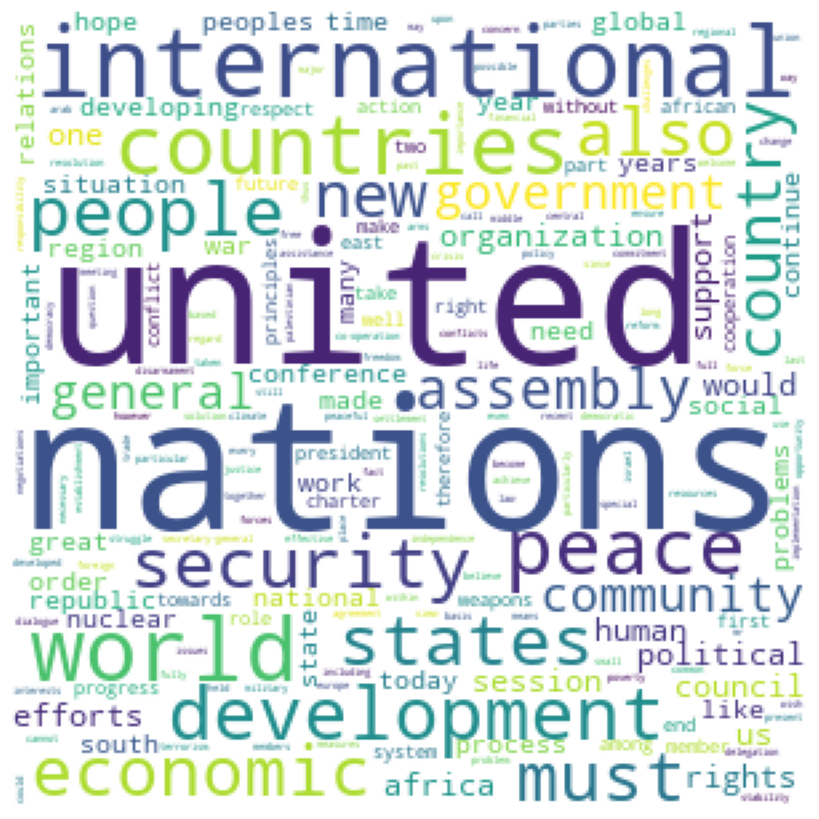

In [16]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [31]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [37]:
freq_df['tfidf']=freq_df['freq']*idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


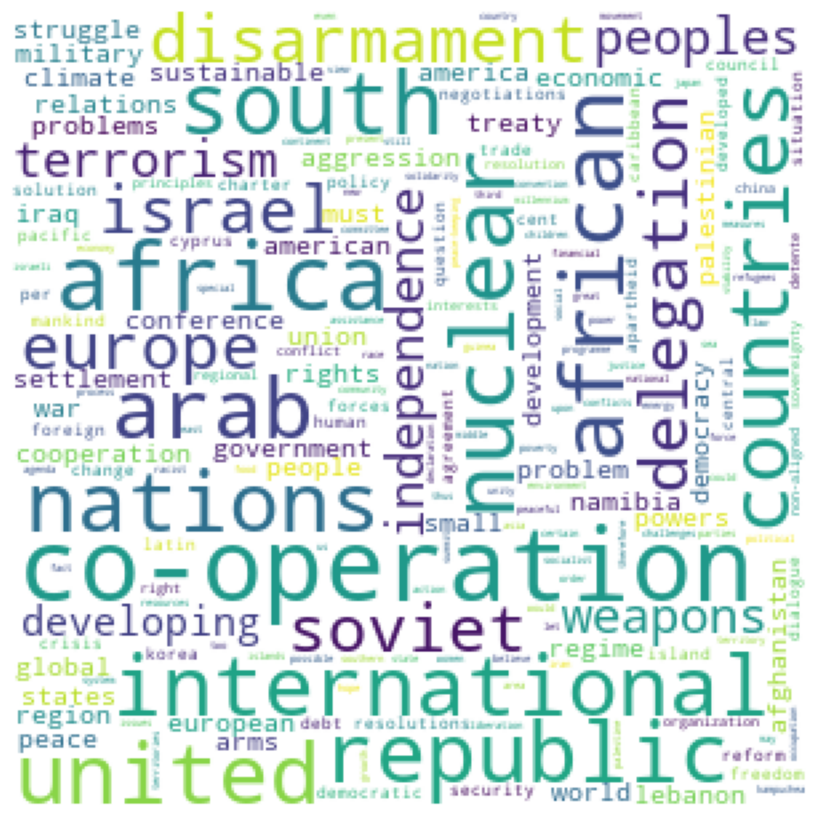

In [38]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
